# Used Cars

Nå skal vi forsøke å anvende maskinlæringsmodeller på bruktbilmarkedet.

## Forberedelser

Importer nødvendige biblioteker

In [0]:
# Biblioteket som vi bruker for å lese og behandle datasettet som kommer fra CSV.
import pandas as pd

# I supervised learning er hver input koblet til en fasit, også kalt "label".
# LabelEncoder brukes for å gjøre fasiten enklere å behandle.
from sklearn.preprocessing import LabelEncoder

# Til slutt må vi importere maskinlæringsmodellene som vi bruker for å trene.
from sklearn import model_selection, metrics, svm

Bruk pandas og importer datasettet som ligger https://github.com/djick/ML101/blob/master/data/usedcars.csv

In [0]:
!wget -q https://raw.githubusercontent.com/djick/ML101/master/data/usedcars.csv -O usedcars.csv
usedcars = pd.read_csv("usedcars.csv")

Vi kan undersøke hva som faktisk ligger i datasettet, hva som skal gå inn i modellen vår, og hva labelen skal være.

In [4]:
print("De første radene i CSV-filen:")
print(usedcars.head(10))

De første radene i CSV-filen:
   year model  price  mileage   color transmission
0  2011   SEL  21992     7413  Yellow         AUTO
1  2011   SEL  20995    10926    Gray         AUTO
2  2011   SEL  19995     7351  Silver         AUTO
3  2011   SEL  17809    11613    Gray         AUTO
4  2012    SE  17500     8367   White         AUTO
5  2010   SEL  17495    25125  Silver         AUTO
6  2011   SEL  17000    27393    Blue         AUTO
7  2010   SEL  16995    21026  Silver         AUTO
8  2011   SES  16995    32655  Silver         AUTO
9  2010   SES  16995    36116  Silver         AUTO


Her får vi se alle featurene som vi har å jobbe med, og er det jo noen muligheter for hva man kan prøve å predikere. Hvilken som helst av disse kolonnene kan være labelen.

Videre, litt statistikk og analyse av hvordan de numeriske verdiene er distribuert.

Statistiske verdier for datasettet:
              year         price        mileage
count   150.000000    150.000000     150.000000
mean   2008.726667  12961.933333   44260.646667
std       2.200966   3122.481735   26982.104322
min    2000.000000   3800.000000    4867.000000
25%    2008.000000  10995.000000   27200.250000
50%    2009.000000  13591.500000   36385.000000
75%    2010.000000  14904.500000   55124.500000
max    2012.000000  21992.000000  151479.000000

Klassedistrubisjon: 

transmission
AUTO      128
MANUAL     22
dtype: int64

model
SE     78
SEL    23
SES    49
dtype: int64

color
Black     35
Blue      17
Gold       1
Gray      16
Green      5
Red       25
Silver    32
White     16
Yellow     3
dtype: int64

Pris:


<function matplotlib.pyplot.show>

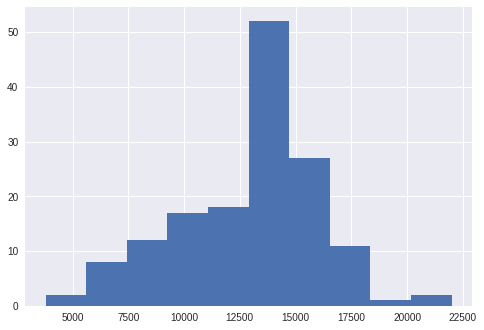

In [5]:
print("Statistiske verdier for datasettet:")
print(usedcars.describe())

print("\nKlassedistrubisjon: ")
print()
print(usedcars.groupby("transmission").size())
print()
print(usedcars.groupby("model").size())
print()
print(usedcars.groupby("color").size())

import matplotlib.pyplot as plt
print("\nPris:")
plt.hist(usedcars["price"])
plt.show

Da maskinlæringsmodellene som vi bruker liker numeriske verdier bedre enn ord må vi endre på noe av datasettet. 






In [0]:
encoder = LabelEncoder()
# Tilpasser encoderen til featuren "model"
encoder.fit(usedcars["model"])
# Endrer den faktiske verdien i datasettet. Modellen "SEL" blir f.eks. til klasse "A".
usedcars["model"] = encoder.fit_transform(usedcars["model"])

# Resetter encoderen
encoder = LabelEncoder()
# TODO gjør det samme for "color"
encoder.fit(usedcars["color"])
usedcars["color"] = encoder.fit_transform(usedcars["color"])


Vi har to kategorier med potensielle labels som man kan bruke til

1. Classification: Labelsene puttes i hver sin boks eller klasse. F.eks. verdiene i kolonnen "color". Fargen gul har ikke noen sammenheng med fargen hvit, derav klassene. Totalt så har vi `model`, `color`, `transmission` i vårt datasett.
2. Regression: Labelsene finnes på samme dimensjon. Pris er et bra eksempel. I vårt datasett har vi `year`, `price` og `mileage`.

Sjekk nå hvordan datasettet ser ut. Du *kan* også sjekke hvordan distribusjonen av featurene er nå, men det skal være det samme som før fordi det eneste du gjorde var å oversette featurene.

In [7]:
# TODO print ut noen rader og sjekk.
print(usedcars.head(10))

   year  model  price  mileage  color transmission
0  2011      1  21992     7413      8         AUTO
1  2011      1  20995    10926      3         AUTO
2  2011      1  19995     7351      6         AUTO
3  2011      1  17809    11613      3         AUTO
4  2012      0  17500     8367      7         AUTO
5  2010      1  17495    25125      6         AUTO
6  2011      1  17000    27393      1         AUTO
7  2010      1  16995    21026      6         AUTO
8  2011      2  16995    32655      6         AUTO
9  2010      2  16995    36116      6         AUTO


Separer features fra targets. Targets er hva du har lyst å predikere.

In [0]:
verdier = usedcars[["year", "model", "price", "mileage", "color"]]
klasser = usedcars["transmission"]

Nå er tiden inne for å dele datasettet opp i trening og test.

In [0]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(verdier, klasser, test_size=0.33, random_state=1)

`X` er featurene og `y` er labelsene. `test_size=0.33` betyr at du tar vare på 33 % av hele datasettet til å validere hvor bra modellen ble trent. `random_state` settes for å shuffle til alle bilene; da unngår man at test og treningsgruppene blir skjevt fordelt.

## Tren modellen
Forarbeidet er gjort. Vi må velge hvilken maskinlæringsmodell vi vil gå for, og deretter trene modellen. Det finnes ganske mange modeller å gå for, alt etter hva `target` er. Det vi vet helt sikkert er at vi skal gå for modeller innenfor supervised learning fordi vi har fasiten, og at vi skal gå for classification (ikke regression) fordi vi skal prøve å predikere transmission-type. Nå er google din venn, og Scikit learn sine websider har bra med dokumentasjon og tutorials.

Et raskt websøk gir https://medium.com/cracking-the-data-science-interview/a-tour-of-the-top-10-algorithms-for-machine-learning-newbies-7228aa8ef541

En oversikt over hvilke modeller Scikit learn har å tilby: https://scikit-learn.org/stable/supervised_learning.html

In [10]:
## Lag en klassifiseringsmodell
print("Modell:")
# Benytter SVM - Support Vector Machine
classifier = svm.SVC()
print(classifier)
print(60 * "=")

Modell:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Tren modellen!

In [11]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Test modellen
De 33 % av datasettet vi sparte i stad får vi nå bruk for.

In [0]:
# Prediker (test)
prediksjoner = classifier.predict(X_test)

`prediksjoner` bør nå være så lik som mulig `y_test`.

In [13]:
print("Resultater:")
print(metrics.classification_report(y_test, prediksjoner, target_names=usedcars["transmission"].unique()))
print(60 * "=")

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, prediksjoner))
print(60 * "=")

Resultater:
              precision    recall  f1-score   support

        AUTO       0.80      1.00      0.89        40
      MANUAL       0.00      0.00      0.00        10

   micro avg       0.80      0.80      0.80        50
   macro avg       0.40      0.50      0.44        50
weighted avg       0.64      0.80      0.71        50

Confusion matrix:
[[40  0]
 [10  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Utfør noen stikkprøver og sjekk hvor ofte modellen treffer riktig.

In [14]:
print("Prediksjon:")
print(y_test.head(10))
print("Fasit:")
print(prediksjoner[0:10])

Prediksjon:
14       AUTO
98       AUTO
75       AUTO
16       AUTO
131      AUTO
56     MANUAL
141      AUTO
44       AUTO
29       AUTO
120      AUTO
Name: transmission, dtype: object
Fasit:
['AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO' 'AUTO']


Hvor bra ble det? Hvorfor ble resultatet slik det ble?

Finnes det andre modeller som gir bedre resultat enn `SVM`?

# Ny modell – pris

Det som kanskje er mer artig er å gjette prisen på en bruktbil. Gjenbruk mye av det ovenfor, men i stedet for å velge `transmission` som target skal du nå velge `price`. Her vil det ikke holde med `SVM` da den brukes til klassifisering. Nå må du se etter en modell som kan utføre regression.

In [15]:
# TODO importer en modell fra sklearn som kan utføre regression
from sklearn.linear_model import LinearRegression

encoder = LabelEncoder()
encoder.fit(usedcars["transmission"])
usedcars["transmission"] = encoder.fit_transform(usedcars["transmission"])

# TODO velg nytt target, dvs. price
verdier = usedcars[["year", "model", "transmission", "mileage", "color"]]
klasser = usedcars["price"]

# TODO del opp i trening og test
X_train, X_test, y_train, y_test = model_selection.train_test_split(verdier, klasser, test_size=0.33, random_state=1)

# TODO opprett en instans av modellen du valgte å importere
classifier = LinearRegression()
print(classifier)
print(60 * "=")

# TODO tren
classifier.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(X_test.head())
print(X_train.head())
print()


# TODO prediker
prediksjoner = classifier.predict(X_test)

print("Fasit:")
print(y_test.head(5))
print("Prediksjoner:")
print(prediksjoner[0:5])

     year  model  transmission  mileage  color
14   2011      0             0    15367      7
98   2009      0             0    44789      3
75   2009      1             0    43369      5
16   2010      1             0    19926      6
131  2006      0             0    71331      7
     year  model  transmission  mileage  color
39   2010      0             0    11165      7
36   2011      0             0    23967      7
117  2008      0             1    40330      4
139  2005      2             0    59013      5
107  2008      0             0    38286      0

Fasit:
14     16000
98     12507
75     13584
16     15999
131     8800
Name: price, dtype: int64
Prediksjoner:
[16316.36571581 13075.53018689 13627.05309504 15508.45001908
  9875.390331  ]
